In [1]:
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

<function matplotlib.pyplot.show(close=None, block=None)>

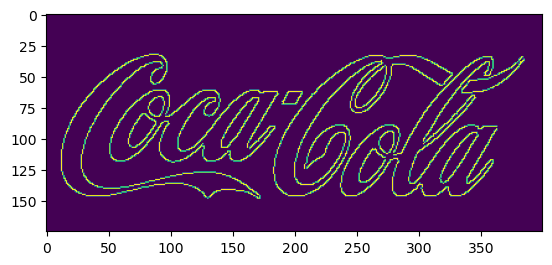

In [56]:
template = cv.imread('template\pattern.png', cv.IMREAD_GRAYSCALE)
template = cv.Canny(template, 100, 250)
plt.imshow(template)
plt.show

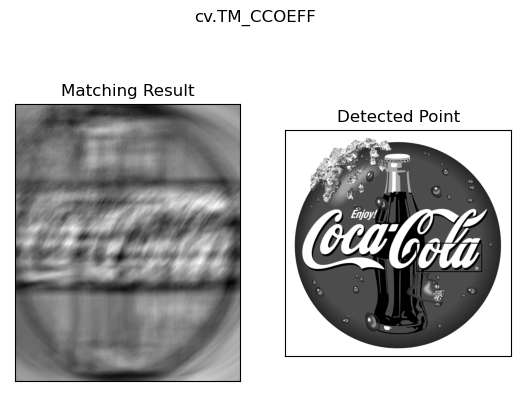

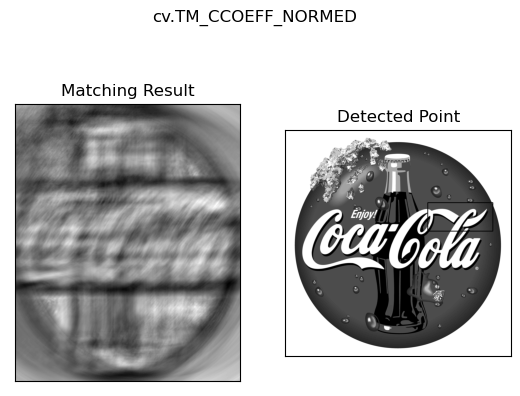

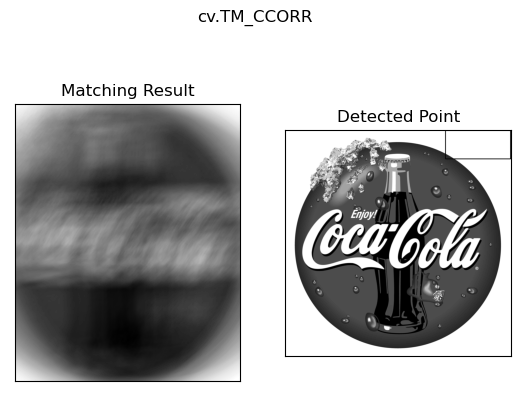

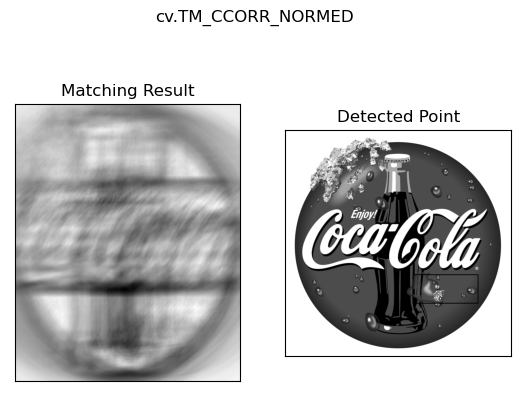

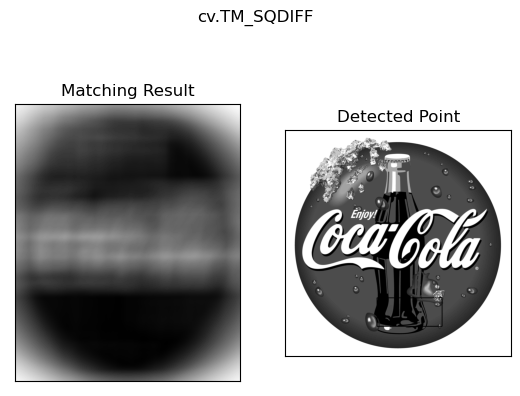

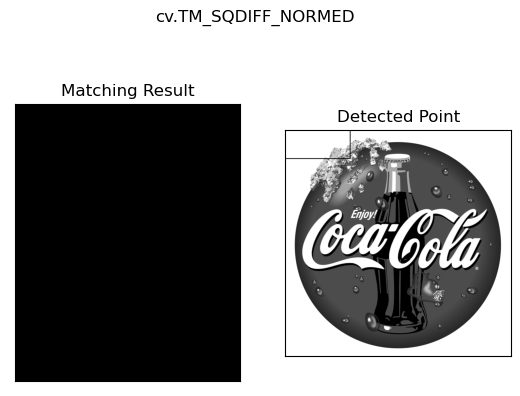

In [36]:
img = cv.imread('images\coca_logo.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
img2 = img.copy()
template = cv.imread('template\pattern.png', cv.IMREAD_GRAYSCALE)
assert template is not None, "file could not be read, check with os.path.exists()"
w, h = template.shape[::-1]
template = cv.Canny(template, 50, 200)

methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Aplico template Matching
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    
    # Para los metodos TM_SQDIFF o TM_SQDIFF_NORMED, el valor minimo funciona mejor
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    
    plt.suptitle(meth)    
    # Dibujamos un bounding box donde detecta el logo
    cv.rectangle(img,top_left, bottom_right, 0, 4)
  
    # Ploteo el mapa del resultado
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])

    # Ploteo el resultado
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
   
    plt.show()

El codigo anterior detecta la imagen objetivo solo cuando comparten la misma escala, por lo tanto para hacerlo funcionar en todas las imagenes hago un loop para buscar la plantilla pero con distintas escalas y devuelvo aquella que tiene mejor macheo


In [62]:
# load the image, convert it to grayscale, and initialize the
# bookkeeping variable to keep track of the matched region
img = cv.imread('images\coca_logo.jpg', cv.IMREAD_GRAYSCALE)
found = None
# loop over the scales of the image
for scale in np.linspace(0.2, 1.0, 20)[::-1]:
	# resize the image according to the scale, and keep track
	# of the ratio of the resizing
	resized = cv.resize(img)
	r = img.shape[1] / float(resized.shape[1])
	# if the resized image is smaller than the template, then break
	# from the loop
	if resized.shape[0] < h or resized.shape[1] < w:
		break

error: OpenCV(4.7.0) :-1: error: (-5:Bad argument) in function 'resize'
> Overload resolution failed:
>  - resize() missing required argument 'dsize' (pos 2)
>  - resize() missing required argument 'dsize' (pos 2)
